# Проект "Анализ поведения пользователей в мобильном приложении"

В нашем распоряжении данные о событиях, совершенных в мобильном приложении, где пользователи продают свои ненужные вещи. Необходимо выделить основные сценарии использования приложения, проанализировать связь целевого события (просмотра контактов) и других действий пользователей.

**Описание данных**  

Колонки в *mobile_sources.csv*: 

- `userId` — идентификатор пользователя,
- `source` — источник, с которого пользователь установил приложение.

Колонки в *mobile_dataset.csv*:

- `event.time` — время совершения,
- `user.id` — идентификатор пользователя,
- `event.name` — действие пользователя.

Виды действий:

- `advert_open` — открыл карточки объявления,
- `photos_show` — просмотрел фотографий в объявлении,
- `tips_show` — увидел рекомендованные объявления,
- `tips_click` — кликнул по рекомендованному объявлению,
- `contacts_show` и `show_contacts` — посмотрел номер телефона,
- `contacts_call` — позвонил по номеру из объявления,
- `map` — открыл карту объявлений,
- `search_1`—`search_7` — разные действия, связанные с поиском по сайту,
- `favorites_add` — добавил объявление в избранное.

**Декомпозиция задачи**

**1. Загрузка, первичный осмотр и предобработка данных**

1. Запись данных в переменные;
2. Исследование пропущенных значений;
3. Исследование соответствия типов;
4. Исследование дубликатов;
5. Проверка корректности наименований колонок;
6. Переименование колонок;
7. Удаление дубликатов;
8. Приведение типов;
9. Замена пропущенных значений.

**2. Проведение исследовательского анализа данных**

1. Расчет Retention Rate;
2. Расчет DAU;
3. Расчет WAU;
4. Расчет количества событий на пользователя.
    
**3. Анализ связи целевого события и других действий пользователей**  

1. Выделение сессий пользователя;  
2. Выделение событий, которые часто совершают пользователи вместе с целевым событием;  
3. Анализ воронки событий;  
4. Анализ времени между совершениями вспомогательного и целевого событий.

**4. Проверка гипотез**

1. Проверка гипотезы: конверсия в просмотры контактов различается у пользователей, совершивших действия tips_show и tips_click и пользователей, совершивших только tips_show.  


2. Проверка гипотезы: конверсия в просмотры контактов различается у пользователей, пришедших с источника установки приложения yandex и пользователей, пришедших с источника google.

**5. Составление дашборда**

1. Построение диаграммы, отображающей количество событий по дням;
2. Построение гистограммы, отображающей количество пользователей, пришедших из разных источников;
3. Добавление фильтра дашборда по типу события.

**6. Подготовка презентации**

**Материалы**

[Ссылка на дашборд](https://public.tableau.com/views/Graduate_project_dashboard/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

[Ссылка на презентацию](https://disk.yandex.ru/i/Timm0n8kOpLReA)

## Загрузка, первичный осмотр и предобработка данных

*Импорт библиотек*

In [128]:
import math as mth

import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from plotly import graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats as st

*Запись данных в переменные*

In [129]:
mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

*Просмотр таблицы `mobile_sourсes`*

In [130]:
mobile_sourсes.info()
mobile_sourсes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


*Просмотр таблицы `mobile_dataset`*

In [131]:
mobile_dataset.info()
mobile_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


_**Пропуски в данных отсутствуют. Необходимо поменять тип данных в столбце `event.time` на datetime. Также нужно скорректировать названия столбцов.**_

*Замена названий столбцов*

In [132]:
mobile_sourсes.rename(columns = {'userId' : 'user_id'}, inplace = True)
print(mobile_sourсes.columns)

mobile_dataset.columns = mobile_dataset.columns.str.replace('.', '_', regex = True)
print(mobile_dataset.columns)

Index(['user_id', 'source'], dtype='object')
Index(['event_time', 'event_name', 'user_id'], dtype='object')


*Приведение даты к типу datetime*

In [133]:
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time'], format='%Y-%m-%d %H:%M:%S.%f')

mobile_dataset.info()
mobile_dataset.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


,event_time,event_name,user_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c


*Подсчет количества полных дубликатов*

In [134]:
print('Количество явных дубликатов в таблице mobile_sourсes:', mobile_sourсes.duplicated().sum())

print('Количество явных дубликатов в таблице mobile_dataset:', mobile_dataset.duplicated().sum())

Количество явных дубликатов в таблице mobile_sourсes: 0
Количество явных дубликатов в таблице mobile_dataset: 0


_**Явные дубликаты в обеих таблицах отсутствуют.**_

*Просмотр уникальных значений столбцов `source` и `event_name` на предмет неявных дубликатов*

In [135]:
print('Уникальные значения столбца source:',
      mobile_sourсes['source'].unique())

print('Уникальные значения столбца event_name:',
      mobile_dataset['event_name'].sort_values().unique())

Уникальные значения столбца source: ['other' 'yandex' 'google']
Уникальные значения столбца event_name: ['advert_open' 'contacts_call' 'contacts_show' 'favorites_add' 'map'
 'photos_show' 'search_1' 'search_2' 'search_3' 'search_4' 'search_5'
 'search_6' 'search_7' 'show_contacts' 'tips_click' 'tips_show']


_**Неявные дубликаты в этих столбцах отсутствуют.**_

*Приведение целевых событий к единому названию*

In [136]:
# замена действия show_contacts на contacts_show
mobile_dataset['event_name'] = mobile_dataset['event_name'].replace('show_contacts', 'contacts_show')

_**Предобработка данных завершена. Можно переходить к дальнейшему анализу.**_

## Исследовательский анализ данных

### Retention Rate

In [137]:
# выделение даты в отдельный столбец
mobile_dataset['event_date'] = pd.to_datetime(mobile_dataset['event_time']).dt.date

*Построение таблицы удержания для недельных лайфтаймов*

In [138]:
# задание горизонта нализа данных
horizon_days = 7

# создание новой таблицы для расчета Retention Rate и добавление столбца с датами первого посещения
result_raw = mobile_dataset.merge(
    mobile_dataset.
    sort_values(by='event_date').
    groupby('user_id').
    agg({'event_date': 'first'}).
    rename(columns={'event_date': 'first_date'}), 
    on='user_id', how='left')

# вычисление лайфтайма каждой сессии в днях
result_raw['lifetime'] = (result_raw['event_date'] - result_raw['first_date']).dt.days

# расчет максимально возможной даты привлечения
last_suitable_acquisition_date = result_raw['first_date'].max() - timedelta(
        days=horizon_days - 1
    )

# исключение пользователей, пришедших после максимальной даты привлечения
result_raw = result_raw.query('first_date <= @last_suitable_acquisition_date')

# построение таблицы удержания
result_grouped = result_raw.pivot_table(
    index='first_date', columns='lifetime', values='user_id', aggfunc='nunique'
)

# добавление размеров когорт
result_grouped = result_grouped.merge(
    result_raw.groupby('first_date').
    agg({'user_id': 'nunique'}).
    rename(columns={'user_id': 'cohort_size'}), 
    on='first_date', how='left').fillna(0)

# деление данных таблицы удержания на размеры когорт
result_grouped = result_grouped.div(
    result_grouped['cohort_size'], axis=0).round(4)

# исключение из результата лайфтаймов, превышающих горизонт анализа
result_grouped = result_grouped[['cohort_size'] + list(range(horizon_days))]

# восстанавление cohort_size
result_grouped['cohort_size'] = result_raw.groupby('first_date').agg({'user_id': 'nunique'})

result_grouped

,cohort_size,0,1,2,3,4,5,6
first_date,,,,,,,,
2019-10-07,204,1.0,0.1814,0.1029,0.1078,0.0686,0.0588,0.0392
2019-10-08,167,1.0,0.1796,0.1198,0.1018,0.0359,0.0359,0.0659
2019-10-09,176,1.0,0.0966,0.0852,0.0568,0.0568,0.0795,0.0568
2019-10-10,174,1.0,0.1379,0.0747,0.1034,0.0747,0.0920,0.0632
2019-10-11,136,1.0,0.0882,0.0809,0.1324,0.0956,0.0662,0.0588
2019-10-12,125,1.0,0.2000,0.1200,0.1040,0.0640,0.0720,0.1040
2019-10-13,148,1.0,0.1757,0.0878,0.0541,0.0743,0.0608,0.0405
2019-10-14,185,1.0,0.1676,0.0919,0.0973,0.1027,0.0703,0.0541
2019-10-15,186,1.0,0.1505,0.1022,0.0914,0.0591,0.0538,0.0645


*Построение тепловой карты удержания*

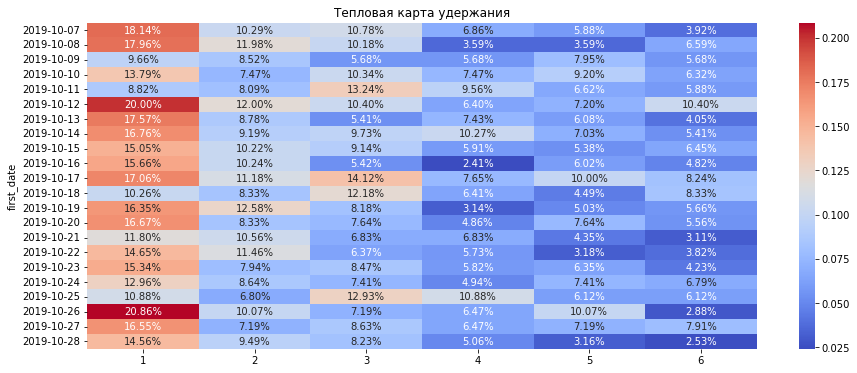

In [139]:
# задание размера графика
plt.figure(figsize=(15, 6)) 

sns.heatmap(
    result_grouped.drop(columns=['cohort_size', 0]),  # удаление лишних столбцов
    annot=True,
    cmap = 'coolwarm',
    fmt='.2%',
)
plt.title('Тепловая карта удержания')
plt.show()

*Построение кривых удержания*

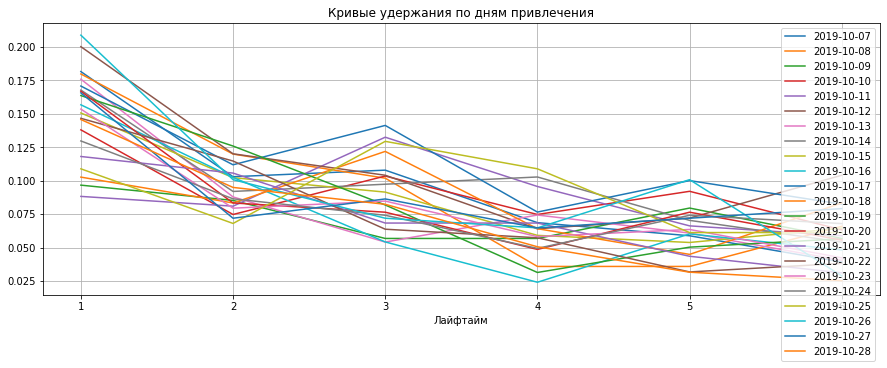

In [140]:
report = result_grouped.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True, 
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 5), 
)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по дням привлечения')  # название графика
plt.legend(loc='upper right')
plt.show()

*Удержание в динамике*

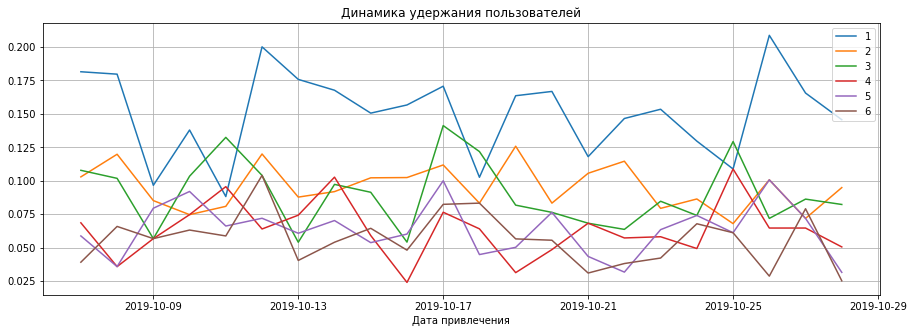

In [141]:
report.plot(grid=True, figsize=(15, 5))
plt.xlabel('Дата привлечения')
plt.title('Динамика удержания пользователей')
plt.show()

_**Лучшее удержание в течение всей недели показали пользователи, пришедшие 12, 17 и 26 октября. Лучшее удержание на 7 день показали пользователи, которые пришли 12, 17, 18 и 27 октября.**_  
_**На второй день возвращалось от 9% до 21% пользователей. На седьмой день - от 2,5% до 10% пользователей.**_   
_**Многие пользователи возвращаются на 4 день после привлечения.**_

### DAU

In [142]:
dau = (
    mobile_dataset
    .groupby('event_date')
    .agg({'user_id': 'nunique'})
    .mean()
)

print('Количество уникальных пользователей в день:', int(dau))

Количество уникальных пользователей в день: 279


### WAU

In [143]:
# добавление столбца с номером недели
mobile_dataset['event_week'] = mobile_dataset['event_time'].dt.isocalendar().week

wau = (
    mobile_dataset
    .groupby('event_week')
    .agg({'user_id': 'nunique'})
    .mean()
)

print('Количество уникальных пользователей в неделю:', int(wau))
print(f'Sticky factor: {(int(dau) / int(wau)):.2%}')

Количество уникальных пользователей в неделю: 1382
Sticky factor: 20.19%


_**В день в приложение заходят 279 уникальных пользователей, в неделю - 1382. "Липкий фактор" составляет 20%.**_

### Количество событий на пользователя

*Расчет количества событий на пользователя в разрезе по событиям*

In [144]:
# создание временной таблицы с кол-вом каждого из событий, которое совершил каждый пользователь
temp = mobile_dataset.groupby(['user_id', 'event_name'])['event_time'].count().reset_index()

# группировка по событиям и просмотр распределения событий на пользователя
temp.groupby('event_name').agg({'event_time':'describe'})

event_time                                                  
                   count       mean        std  min  25%  50%   75%    max
event_name                                                                
advert_open        751.0   8.207723  12.699375  1.0  2.0  4.0   8.5  137.0
contacts_call      213.0   2.539906   2.387972  1.0  1.0  2.0   3.0   17.0
contacts_show      981.0   4.616718   9.621611  1.0  1.0  2.0   4.0  137.0
favorites_add      351.0   4.037037   6.291609  1.0  1.0  2.0   5.0   63.0
map               1456.0   2.665522   4.750844  1.0  1.0  1.0   3.0   71.0
photos_show       1095.0   9.143379  14.614813  1.0  3.0  5.0   9.0  177.0
search_1           787.0   4.454892   6.042591  1.0  2.0  3.0   5.0   68.0
search_2           242.0   1.338843   1.508228  1.0  1.0  1.0   1.0   23.0
search_3           208.0   2.509615   2.624652  1.0  1.0  2.0   3.0   21.0
search_4           474.0   1.478903   1.986364  1.0  1.0  1.0   1.0   35.0
search_5           663.0   1.582202   1.806864  1.0  1.0  1.0   2.0   25.0
search_6           330.0   1.393939   1.206351  1.0  1.0  1.0   1.0   17.0
search_7           157.0   1.414013   1.310923  1.0  1.0  1.0   1.0   13.0
tips_click         322.0   2.527950   2.942993  1.0  1.0  1.0   3.0   30.0
tips_show         2801.0  14.300250  23.120743  1.0  4.0  8.0  15.0  346.0

*Построение графиков частоты событий*

In [145]:
# функция для добавления значений по оси ординат над столбцами
def autolabel(rects, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        label = round(height, 2)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')

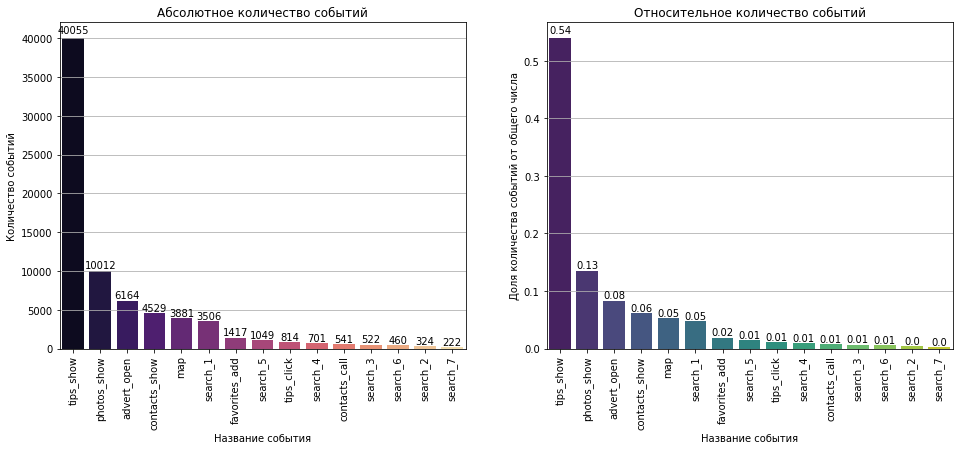

In [146]:
# создание ячеек для графиков
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))

# построение графика абсолютного количества событий
ax=plt.subplot(1, 2, 1)
ax = sns.countplot(
    x='event_name', 
    palette='magma',
    order=mobile_dataset['event_name'].value_counts().index, 
    data=mobile_dataset
)

# добавление параметров графика
ax.set_xlabel('Название события')
ax.set_ylabel('Количество событий')
ax.set_title('Абсолютное количество событий')
ax.grid(axis = 'y')
autolabel(ax.patches)
plt.xticks(rotation = 90);

# построение графика относительного количества событий
ax=plt.subplot(1, 2, 2)
ax = sns.barplot(
    x='event_name', 
    y='user_id', 
    data=(
        mobile_dataset
        .groupby('event_name')
        .agg({'user_id': 'count'})
        .reset_index()
    ),
    estimator=lambda x: sum(x) / len(mobile_dataset['event_name']),
    palette="viridis", 
    ci=None,
    order=(
        mobile_dataset
        .groupby('event_name')
        .agg({'user_id': 'count'})
        .sort_values(by='user_id', ascending=False)
        .index
    )
           )

# добавление параметров графика
ax.set_xlabel('Название события')
ax.set_ylabel('Доля количества событий от общего числа')
ax.set_title('Относительное количество событий')
ax.grid(axis = 'y')
autolabel(ax.patches)
plt.xticks(rotation = 90);

_**Более половины от всех событий составляет событие tips_show - пользователь видит рекомендованные объявления. Но кликает на них только один раз из 50.**_  
_**13% событий составляет просмотр фотографий в объявлении. 8% - открытия карточек объявлений, 6% - просмотр номера телефона. Открытия карты объявлений и поисковые действия №1 составляют по 5% от общего числа событий. Остальные события составляют 2% и менее от общего числа.**_ 

*Т.к. рекомендуемые объявления показываются каждому пользователю автоматически, фактически пользователь не участвует в событии `tips_show`, и для некоторых расчетов его можно исключить.*

*Построение графиков частоты событий без учета события `tips_show`*

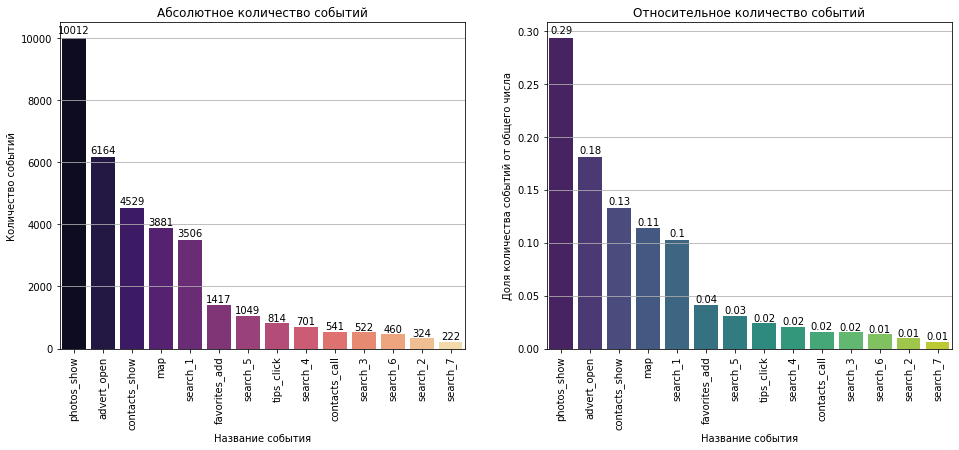

In [147]:
# создание ячеек для графиков
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))

# построение графика абсолютного количества событий
ax=plt.subplot(1, 2, 1)
ax = sns.countplot(
    x='event_name', 
    palette='magma',
    order=mobile_dataset.query('event_name != "tips_show"')['event_name'].value_counts().index, 
    data=mobile_dataset.query('event_name != "tips_show"')
)

# добавление параметров графика
ax.set_xlabel('Название события')
ax.set_ylabel('Количество событий')
ax.set_title('Абсолютное количество событий')
ax.grid(axis = 'y')
autolabel(ax.patches)
plt.xticks(rotation = 90);

# построение графика относительного количества событий
ax=plt.subplot(1, 2, 2)
ax = sns.barplot(
    x='event_name', 
    y='user_id', 
    data=(
        mobile_dataset
        .query('event_name != "tips_show"')
        .groupby('event_name')
        .agg({'user_id': 'count'})
        .reset_index()
    ),
    estimator=lambda x: sum(x) / len(mobile_dataset.query('event_name != "tips_show"')['event_name']),
    palette="viridis", 
    ci=None,
    order=(
        mobile_dataset
        .query('event_name != "tips_show"')
        .groupby('event_name')
        .agg({'user_id': 'count'})
        .sort_values(by='user_id', ascending=False)
        .index
    )
           )

# добавление параметров графика
ax.set_xlabel('Название события')
ax.set_ylabel('Доля количества событий от общего числа')
ax.set_title('Относительное количество событий')
ax.grid(axis = 'y')
autolabel(ax.patches)
plt.xticks(rotation = 90);

_**Если исключить из расчета событие `tips_show`, то около трети событий будет составлять просмотр фотографий в объявлении, 18% - открытия карточек объявлений, 13% - просмотр номера телефона. Открытия карты объявлений и поисковые действия №1 составляют примерно по 10% от общего числа событий. Остальные события составляют 5% и менее от общего числа.**_

## Анализ связи целевого события и других действий пользователей

### Выделение сессий пользователей

In [148]:
# вычисление длительности сессий при условии что между событиями прошло менее 5 минут
session_duration = (
    mobile_dataset
    .sort_values(by=['user_id', 'event_time'])
    .groupby('user_id')['event_time']
    .diff() > pd.Timedelta('5Min')
).cumsum()

# группировка по пользователям и длительностям сессий, нумерация групп
mobile_dataset['session_id'] = mobile_dataset.groupby(['user_id', session_duration], sort=False).ngroup() + 1
print('Выделено сессий:', mobile_dataset['session_id'].max())
mobile_dataset.head(10)

Выделено сессий: 16366


,event_time,event_name,user_id,event_date,event_week,session_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,41,1
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,41,1
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,41,2
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,41,1
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,41,2
5,2019-10-07 00:01:19.993624,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,41,2
6,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,41,1
7,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,41,1
8,2019-10-07 00:01:49.732803,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,41,2
9,2019-10-07 00:01:54.958298,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,41,1


_**Выделение пользовательских сессий прошло успешно.**_

### Выделение событий, которые часто совершают пользователи вместе с целевым событием

*Создание списка с номерами сессий, в которых присутствует целевое событие*

In [149]:
sessions_with_target_event_list = (
    mobile_dataset
    .query('event_name == "contacts_show"')['session_id']
    .unique()
    .tolist()
)
print('Количество сессий, в которых произошло целевое событие:', 
      len(sessions_with_target_event_list))

Количество сессий, в которых произошло целевое событие: 2288


*Получение таблицы с сессиями, в которых присутствует целевое событие*

In [150]:
sessions_with_target_event = mobile_dataset.query('session_id in @sessions_with_target_event_list')
sessions_with_target_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13114 entries, 12 to 74196
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  13114 non-null  datetime64[ns]
 1   event_name  13114 non-null  object        
 2   user_id     13114 non-null  object        
 3   event_date  13114 non-null  object        
 4   event_week  13114 non-null  UInt32        
 5   session_id  13114 non-null  int64         
dtypes: UInt32(1), datetime64[ns](1), int64(1), object(3)
memory usage: 678.8+ KB


*Построение графиков количества событий*

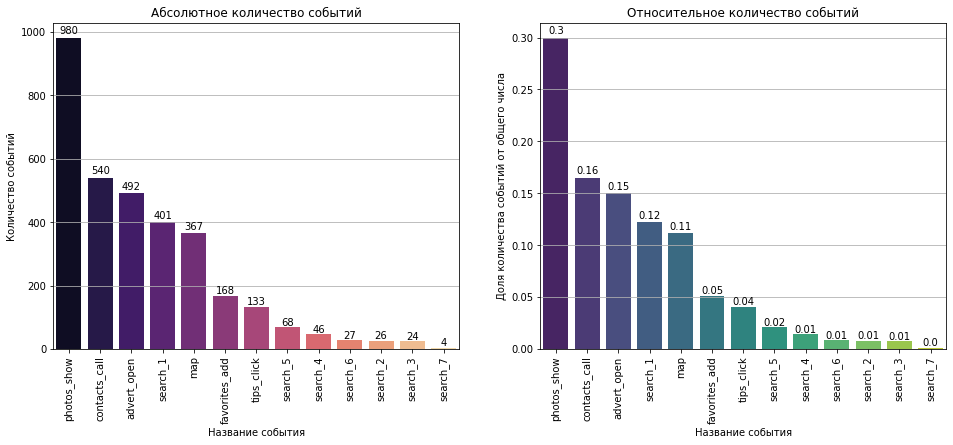

In [151]:
# создание ячеек для графиков
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))

# построение графика абсолютного количества событий
ax=plt.subplot(1, 2, 1)
ax = sns.countplot(
    x='event_name', 
    palette='magma',
    order=(
        sessions_with_target_event
        .query('event_name != "contacts_show" and event_name != "tips_show"')['event_name']
        .value_counts()
        .index
    ), 
    data=sessions_with_target_event.query('event_name != "contacts_show" and event_name != "tips_show"')
)

# добавление параметров графика
ax.set_xlabel('Название события')
ax.set_ylabel('Количество событий')
ax.set_title('Абсолютное количество событий')
ax.grid(axis = 'y')
autolabel(ax.patches)
plt.xticks(rotation = 90);

# построение графика относительного количества событий
ax=plt.subplot(1, 2, 2)
ax = sns.barplot(
    x='event_name', 
    y='user_id', 
    data=(
        sessions_with_target_event
        .query('event_name != "contacts_show" and event_name != "tips_show"')
        .groupby('event_name')
        .agg({'user_id': 'count'})
        .reset_index()
    ),
    estimator=lambda x: sum(x) / len(
        sessions_with_target_event.
        query('event_name != "contacts_show" and event_name != "tips_show"')
        ['event_name']),
    palette="viridis", 
    ci=None,
    order=(
        sessions_with_target_event
        .query('event_name != "contacts_show" and event_name != "tips_show"')
        .groupby('event_name')
        .agg({'user_id': 'count'})
        .sort_values(by='user_id', ascending=False)
        .index
    )
           )

# добавление параметров графика
ax.set_xlabel('Название события')
ax.set_ylabel('Доля количества событий от общего числа')
ax.set_title('Относительное количество событий')
ax.grid(axis = 'y')
autolabel(ax.patches)
plt.xticks(rotation = 90);

_**Около трети событий, совершенных вместе с целевым, это просмотр фотографий в объявлении, в 2 раза реже совершаются звонки по номерам из объявлений и открытия карточек объявлений.**_

### Анализ воронки событий

*Расчет количества пользователей, совершивших каждое событие, для формирования цепочек событий*

In [152]:
# создание таблицы с количеством пользователей, совершивших каждое событие
(
    mobile_dataset
    .groupby('event_name')
    .agg({'user_id': 'nunique'})
    .sort_values(by='user_id', ascending=False)
)

,user_id
event_name,
tips_show,2801
map,1456
photos_show,1095
contacts_show,981
search_1,787
advert_open,751
search_5,663
search_4,474
favorites_add,351


*Составление цепочек событий*  
*1. "Классическая" цепочка: `search_1` -> `advert_open` -> `photos_show` -> `contacts_show`.*  
*2. Цепочка с заходом через рекомендованные объявления: `tips_show` -> `tips_click` -> `photos_show` -> `contacts_show`.*  
*3. Цепочка с добавлением в избранное: `advert_open` -> `photos_show` -> `favorites_add` -> `contacts_show`.*  
*4. Цепочка с просмотром карты объявлений: `search_1` -> `map` -> `advert_open` -> `contacts_show`.*  

In [153]:
# создание переменных с последовательностями событий

sequence_of_events_classic = ('search_1', 'advert_open', 'photos_show', 'contacts_show')
sequence_of_events_tips = ('tips_show', 'tips_click', 'photos_show', 'contacts_show')
sequence_of_events_favorites = ('advert_open', 'photos_show', 'favorites_add', 'contacts_show')
sequence_of_events_map = ('search_1', 'map', 'advert_open', 'contacts_show')

*Создание функции для визуализации воронок событий*

In [154]:
def funnel_drawing(sequence_of_events):
    
    #создание списка пользователей, совершивших первое событие
    user_list = (
        mobile_dataset
        .query('event_name == @sequence_of_events[0]')
        ['user_id']
        .unique()
    )
    
    #создание списка с кол-вом пользователей для сквозной воронки
    users_in_initial_funnel = []
    for value in sequence_of_events:
        users_in_initial_funnel.append(mobile_dataset
        .query('event_name == @value and user_id in @user_list')['user_id'].nunique())
    
    #создание пустого списка для воронки от предыдущего этапа
    users_in_previous_funnel = []
    
    #добавление в список кол-ва пользователей, совершивших первый шаг воронки
    users_in_previous_funnel.append(mobile_dataset
            .query('event_name == @sequence_of_events[0]')['user_id'].nunique())
    
    #добавление в список кол-ва пользователей, совершивших остальные этапы воронки, 
    #из тех, кто совершил предыдущий этап
    for i in range(0, len(sequence_of_events) - 1):
        user_list = (
                mobile_dataset
                .query(f'event_name == @sequence_of_events[{i}] and user_id in @user_list')
                ['user_id']
                .unique()
            )
        users_in_previous_funnel.append(mobile_dataset
                .query(f'event_name == @sequence_of_events[{i+1}] and user_id in @user_list')['user_id'].nunique())
    
    # визуализация воронок    
    fig = make_subplots(rows = 1, cols = 2, subplot_titles=("Сквозная воронка", "Воронка от предыдущего этапа"))
    for k, value in enumerate((users_in_initial_funnel, users_in_previous_funnel), start=1):
        fig.add_trace(
            go.Funnel(
                y=sequence_of_events,
                x=value,
                text = sequence_of_events,
                textposition = "inside",
                textinfo = "text+value",
                opacity = 0.9, 
                marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal"],
                          "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "teal", "wheat"]}},
                connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}}),
            row=1, col=k
        )
        
    fig.update_yaxes(row=1, col=2, showticklabels=False)
    fig.show()

*Визуализация "классической" цепочки*

In [155]:
funnel_drawing(sequence_of_events_classic)

_**Данные события не составляют какую-либо воронку. Карточку объявления открывают в 16 раз меньше пользователей, чем совершают поисковое событие `search_1`.**_

*Визуализация цепочки с заходом через рекомендованные объявления*

In [156]:
funnel_drawing(sequence_of_events_tips)

_**Данные события также не составляют воронку. Лишь каждый 9й пользователь, увидевший рекомендованные объявления, переходит на них.**_

*Визуализация цепочки с добавлением в избранное*

In [157]:
funnel_drawing(sequence_of_events_favorites)

*Виуализация цепочки с просмотром карты объявлений*

In [158]:
funnel_drawing(sequence_of_events_map)

_**Ни одна из сформированных цепочек событий не составила воронку. Можно предположить, что все эти события - это самостоятельные события пользователя.**_

### Анализ времени между совершениями вспомогательного и целевого событий

*Создание таблицы с временными интервалами между совершениями вспомогательного и целевого событий в рамках одной сессии*

In [159]:
# создание таблицы
time_between_events_table = (
    sessions_with_target_event
    .groupby(['session_id', 'event_name'])
    .agg({'event_time': 'first'})
    .reset_index()
    .merge(
        sessions_with_target_event
        .query('event_name == "contacts_show"')
        .groupby('session_id')
        .agg({'event_time': 'first'}),
        how = 'left',
        on = 'session_id'
    )
)

# переименование столбцов
time_between_events_table.rename(
    columns = {
        'event_time_x' : 'first_event_time', 
        'event_time_y' : 'first_target_event_time'
    }, inplace = True
)

# добавление столбца с интервалом между событиями
time_between_events_table['time_interval'] = abs(
    time_between_events_table['first_event_time'] - 
    time_between_events_table['first_target_event_time']
).dt.seconds

time_between_events_table.head(10)

,session_id,event_name,first_event_time,first_target_event_time,time_interval
0,3,contacts_show,2019-10-07 00:05:16.003328,2019-10-07 00:05:16.003328,0
1,3,tips_click,2019-10-07 00:14:37.801823,2019-10-07 00:05:16.003328,561
2,3,tips_show,2019-10-07 00:02:07.374346,2019-10-07 00:05:16.003328,188
3,19,contacts_show,2019-10-07 08:11:07.995945,2019-10-07 08:11:07.995945,0
4,19,photos_show,2019-10-07 08:08:29.271000,2019-10-07 08:11:07.995945,158
5,19,search_1,2019-10-07 08:10:01.339216,2019-10-07 08:11:07.995945,66
6,32,contacts_show,2019-10-07 09:33:19.822541,2019-10-07 09:33:19.822541,0
7,49,contacts_show,2019-10-07 10:19:49.080484,2019-10-07 10:19:49.080484,0
8,49,tips_show,2019-10-07 10:18:55.701270,2019-10-07 10:19:49.080484,53
9,50,contacts_show,2019-10-07 10:22:52.431529,2019-10-07 10:22:52.431529,0


*Подсчет среднего значения времени между совершениями вспомогательного и целевого событий в минутах*

In [160]:
(
    (time_between_events_table
     .groupby('event_name')
     ['time_interval']
     .mean() / 60)
    .round(2)
    .sort_values()
)

event_name
contacts_show    0.00
contacts_call    0.46
search_4         3.18
photos_show      3.24
advert_open      3.40
search_7         3.46
search_1         3.49
tips_show        3.51
search_6         3.61
search_5         3.70
search_2         3.91
favorites_add    4.03
map              4.73
tips_click       6.10
search_3         6.40
Name: time_interval, dtype: float64

_**Ближе всего к целевому событию - просмотру номера телефона - звонок по номеру из объявления, между ними в среднем 28 секунд. Остальные события располагаются во временном интервале больше 3х минут. Среди наиболее близких - просмотр фотографий в объявлении и просмотр карточек объявлений. Самые далекие события - клик по рекомендованному объявлению и поисковое событие `search_3`, до них в среднем уже более 6 минут.**_

## Проверка гипотез

### Проверка гипотезы: конверсия в просмотры контактов различается у пользователей, совершивших действия tips_show и tips_click и пользователей, совершивших только tips_show

_**Нулевая гипотеза**_   
*Конверсия в просмотры контактов у пользователей, совершивших действия tips_show и tips_click и пользователей, совершивших только tips_show, одинакова.*

_**Альтернативная гипотеза**_   
*Конверсия в просмотры контактов у пользователей, совершивших действия tips_show и tips_click и пользователей, совершивших только tips_show, различается.*

*Создание сводной таблицы, которая отображает, сколько событий каждого вида совершил пользователь*

In [161]:
events_per_user = (
    mobile_dataset
    .pivot_table(
        values='event_time', 
        index='user_id', 
        columns='event_name', 
        aggfunc='count')
    .fillna(0)
)

events_per_user.head()

event_name,advert_open,contacts_call,contacts_show,favorites_add,map,photos_show,search_1,search_2,search_3,search_4,search_5,search_6,search_7,tips_click,tips_show
user_id,,,,,,,,,,,,,,,
0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
00157779-810c-4498-9e05-a1e9e3cedf93,2.0,5.0,11.0,2.0,0.0,33.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00463033-5717-4bf1-91b4-09183923b9df,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
004690c3-5a84-4bb7-a8af-e0c8f8fca64e,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,2.0,6.0,2.0,6.0,0.0,4.0
00551e79-152e-4441-9cf7-565d7eb04090,0.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Проверка на пересечение групп тут не требуется, поскольку пользователи разбиваются на группы на таких условиях, на которых пересечение невозможно.*

*Создание функции для подсчета критерия статистического отличия между группами*

In [162]:
def z_test(successes_1, successes_2, trials_1, trials_2, alpha = .05):
    
    successes = np.array([successes_1, 
                          successes_2])
    
    trials = np.array([trials_1,
                       trials_2])

    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(
        p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1])
    )

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)

    p_value = ((1 - distr.cdf(abs(z_value))) * 2)

    if p_value < alpha:
        return f'p-значение:{p_value}, Отвергаем нулевую гипотезу: между долями есть значимая разница'
    else:
        return f'p-значение:{p_value}, Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

*Применение функции для проверки гипотезы*

In [163]:
z_test(
    len(events_per_user.query('tips_show > 0 and tips_click > 0 and contacts_show > 0')), 
    len(events_per_user.query('tips_show > 0 and tips_click == 0 and contacts_show > 0')), 
    len(events_per_user.query('tips_show > 0 and tips_click > 0')), 
    len(events_per_user.query('tips_show > 0 and tips_click == 0'))
)

'p-значение:9.218316554537864e-09, Отвергаем нулевую гипотезу: между долями есть значимая разница'

_**p-значение составляет порядка 9 в минус девятой степени. Доли статистически различны. Нулевую гипотезу следует отвергнуть. Нет оснований полагать, что конверсия в просмотры контактов у пользователей, совершивших действия tips_show и tips_click и пользователей, совершивших только tips_show, одинакова.**_

### Проверка гипотезы: конверсия в просмотры контактов различается у пользователей, пришедших с источника установки приложения yandex и пользователей, пришедших с источника google

_**Нулевая гипотеза**_   
*Конверсия в просмотры контактов у пользователей, пришедших с источника установки приложения yandex и пользователей, пришедших с источника google, одинакова.*

_**Альтернативная гипотеза**_   
*Конверсия в просмотры контактов у пользователей, пришедших с источника установки приложения yandex и пользователей, пришедших с источника google, различается.*

*Проверка на пересечение групп теста*

In [164]:
print('Кол-во пользователей, пришедших и из источника yandex и из источника google:',
      len(
          mobile_sourсes
          .query('source in ("yandex", "google")')
          .groupby('user_id')
          .agg({'source': 'nunique'})
          .query('source > 1'))
     )

Кол-во пользователей, пришедших и из источника yandex и из источника google: 0


_**Группы теста не пересекаются.**_

*Присоединение источника установки приложения к сводной таблице*

In [165]:
events_per_user = events_per_user.reset_index().merge(mobile_sourсes, on='user_id', how='left')
events_per_user.head()

,user_id,advert_open,contacts_call,contacts_show,favorites_add,map,photos_show,search_1,search_2,search_3,search_4,search_5,search_6,search_7,tips_click,tips_show,source
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,other
1,00157779-810c-4498-9e05-a1e9e3cedf93,2.0,5.0,11.0,2.0,0.0,33.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,yandex
2,00463033-5717-4bf1-91b4-09183923b9df,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,yandex
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,2.0,6.0,2.0,6.0,0.0,4.0,google
4,00551e79-152e-4441-9cf7-565d7eb04090,0.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,yandex


*Применение функции для проверки гипотезы*

In [166]:
z_test(
    len(events_per_user.query('source == "yandex" and contacts_show > 0')), 
    len(events_per_user.query('source == "google" and contacts_show > 0')), 
    len(events_per_user.query('source == "yandex"')), 
    len(events_per_user.query('source == "google"'))
)

'p-значение:0.8244316027993777, Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

_**p-значение составляет около 82%. Статистически значимых отличий между долями групп не выявлено. Нельзя утверждать, что конверсия в просмотры контактов различается у пользователей, пришедших с источника установки приложения yandex и пользователей, пришедших с источника google.**_

## Выводы

1. *В ходе исследования  "Анализ поведения пользователей в мобильном приложении" была проведена предобработка данных, исследовательский анализ данных, анализ связи целевого события — просмотра контактов — и других действий пользователей, а также проверка статистических гипотез.*
2. *Анализ удержания пользователей показал, что на второй день возвращалось от 9% до 21% пользователей. На седьмой день - от 2,5% до 10% пользователей. Многие пользователи возвращаются на 4 день после привлечения.*
3. *Количество уникальных пользователей в день составило 279 человек. Количество уникальных пользователей в неделю - 1382 человека.*
4. *Самыми популярными событиями являются:`tips_show` - пользователь видит рекомендованные объявления, `photos_show` - просмотр фотографий в объявлении и `advert_open` - открытия карточек объявлений.*
5. *Вместе с целевым событием чаще всего происходят следующие события (без учета `tips_show`): `photos_show` - просмотр фотографий в объявлении, `contacts_call` - звонки по номеру из объявлений и `advert_open` - открытия карточек объявлений.*
6. *События, совершаемые пользователями, не составляют какой-либо воронки, каждое событие -  это самостоятельное событие пользователя.*
7. *Ближе всего к целевому событию (просмотру номера телефона) по времени события: `contacts_call` - звонок по номеру из объявления, `photos_show` - просмотр фотографий в объявлении и `advert_open` - просмотр карточек объявлений.*
8. *Доли пользователей, конвертировавшихся в просмотры контактов, среди пользователей, совершивших действия tips_show и tips_click и пользователей, совершивших только tips_show, статистически различны.*
9. *Статистически значимых отличий между долями пользователей, конвертировавшихся в просмотры контактов, среди пользователей, пришедших с источника установки приложения yandex и пользователей, пришедших с источника google, не выявлено.*

_**Рекомендации**_

_"Фичи", которые работают - это просмотр фотографий в объявлении, поисковое действие №1 и просмотр карты объявлений. Эти действия наиболее часто встречаются вместе с целевым событием._

*Каких-то конкретных сценариев использования приложения нет, каждое совершаемое пользователем событие самостоятельно.*  
*Наиболее популярные события:*
- *`photos_show` — просмотр фотографий в объявлении;*
- *`advert_open` — открытие карточки объявления;*
- *`contacts_show` и `show_contacts` — посмотр номера телефона;*
- *`map` — открытие карты объявлений;*
- *`search_1` — действие, связанное с поиском по сайту.*  

_Соответственно, совершение этих действий для пользователя должно быть интуитивно понятно._

*Необходимо улучшать систему рекомендованных объявлений. Сейчас на 50 событий, что пользователь увидел рекомендованные объявления, приходится только один клик по данным объявлениям. А ведь у пользователей, кликнувших по таким объявлениям, лучше конверсия в просмотры контактов.*

*Доли групп пользователей, конвертировавшихся в просмотры контактов, среди пользователей, пришедших с источников установки приложений yandex и google, статистически не различаются. Значит, если будет рекламная компания по привлечению пользователей, вкладываться в какой-то один конкретный источник смысла нет.*